In [1]:
from utils import *
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import glob
from joblib import Parallel, delayed

In [2]:
transform_name = 'MagnitudeWarp'
use_log_x_axis = True

In [3]:
df = load_robustnes(transform_name)#.query('method!="knn"')
print(len(df.dataset.unique()))
df

Loaded 14759 files
128


dataset       method            transform  seed  accuracy  \
0                    Yoga        drcif  MagnitudeWarp;100.0     0  0.507000   
0             SwedishLeaf     baseline   MagnitudeWarp;50.0     0  0.052800   
0     EOGHorizontalSignal          cnn  MagnitudeWarp;500.0     0  0.082873   
0   ChlorineConcentration  rocket-k500  MagnitudeWarp;100.0     0  0.267188   
0    RefrigerationDevices          cnn   MagnitudeWarp;10.0     0  0.378667   
..                    ...          ...                  ...   ...       ...   
0             ShapeletSim          cnn   MagnitudeWarp;10.0     0  0.461111   
0         GestureMidAirD2       weasel    MagnitudeWarp;0.1     0  0.200000   
0       DodgerLoopWeekend    inception    MagnitudeWarp;1.0     0  0.471014   
0          PigArtPressure      tsfresh    MagnitudeWarp;5.0     0  0.043269   
0                FacesUCR         eknn  MagnitudeWarp;100.0     0  0.212195   

                                                 pred  \
0                                   [1 1 1 ... 1 1 1]   
0   [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 ...   
0   [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8...   
0                                   [1 1 1 ... 3 1 1]   
0   [1 1 1 1 3 3 3 3 3 2 1 1 1 2 1 1 2 3 2 3 3 3 1...   
..                                                ...   
0   [1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1...   
0   [22 17  8 17  8 21 22 15 23 23  8 13 22  1 15 ...   
0   [2 2 2 2 1 2 2 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 2...   
0   [18  2 29  8 34  5  6 47 27 27  2 42  6 47 27 ...   
0                             [13  7  6 ...  9 13  7]   

                                                 true  level  \
0                                   [1 2 1 ... 2 2 2]  100.0   
0   [10 11  8 12 14  1  5 11 13  6  1 15 10  7  2 ...   50.0   
0   [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2 ...  500.0   
0                                   [2 2 1 ... 3 3 3]  100.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   10.0   
..                                                ...    ...   
0   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   10.0   
0   [ 5 12 18 13 22 20 11 10 16 22 11 12 16  2  1 ...    0.1   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...    1.0   
0   [ 1  1  1  1  2  2  2  2  3  3  3  3  4  4  4 ...    5.0   
0                                   [8 7 6 ... 9 9 7]  100.0   

         transform_type  
0   MagnitudeWarp;100.0  
0    MagnitudeWarp;50.0  
0   MagnitudeWarp;500.0  
0   MagnitudeWarp;100.0  
0    MagnitudeWarp;10.0  
..                  ...  
0    MagnitudeWarp;10.0  
0     MagnitudeWarp;0.1  
0     MagnitudeWarp;1.0  
0     MagnitudeWarp;5.0  
0   MagnitudeWarp;100.0  

[14759 rows x 9 columns]

In [4]:
df.method.unique()

array(['drcif', 'baseline', 'cnn', 'rocket-k500', 'eknn', 'inception-d4',
       'catch22', 'tsforest', 'rocket', 'tsfresh', 'hivecotev2',
       'inception-d2', 'weasel', 'inception'], dtype=object)

In [5]:
df = df.query('method.str.contains("-") == False', engine='python')

In [6]:
df = filter_out_incomplete_datasets(df)
print(len(df.dataset.unique()))
df

['drcif' 'baseline' 'cnn' 'eknn' 'catch22' 'tsforest' 'rocket' 'tsfresh'
 'hivecotev2' 'weasel' 'inception']
['MagnitudeWarp;100.0' 'MagnitudeWarp;50.0' 'MagnitudeWarp;500.0'
 'MagnitudeWarp;10.0' 'MagnitudeWarp;0.5' 'MagnitudeWarp;1.0'
 'MagnitudeWarp;0.0' 'MagnitudeWarp;0.1' 'MagnitudeWarp;5.0']
99
not complete datasets: {'Rock', 'UWaveGestureLibraryY', 'Fungi'}
125


dataset     method            transform  seed  accuracy  \
0                   Yoga      drcif  MagnitudeWarp;100.0     0  0.507000   
0            SwedishLeaf   baseline   MagnitudeWarp;50.0     0  0.052800   
0    EOGHorizontalSignal        cnn  MagnitudeWarp;500.0     0  0.082873   
0   RefrigerationDevices        cnn   MagnitudeWarp;10.0     0  0.378667   
0             ScreenType       eknn  MagnitudeWarp;500.0     0  0.349333   
..                   ...        ...                  ...   ...       ...   
0            ShapeletSim        cnn   MagnitudeWarp;10.0     0  0.461111   
0        GestureMidAirD2     weasel    MagnitudeWarp;0.1     0  0.200000   
0      DodgerLoopWeekend  inception    MagnitudeWarp;1.0     0  0.471014   
0         PigArtPressure    tsfresh    MagnitudeWarp;5.0     0  0.043269   
0               FacesUCR       eknn  MagnitudeWarp;100.0     0  0.212195   

                                                 pred  \
0                                   [1 1 1 ... 1 1 1]   
0   [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 ...   
0   [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8...   
0   [1 1 1 1 3 3 3 3 3 2 1 1 1 2 1 1 2 3 2 3 3 3 1...   
0   [1 2 3 1 3 3 2 2 2 3 3 2 1 2 2 1 3 3 1 2 2 3 2...   
..                                                ...   
0   [1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1...   
0   [22 17  8 17  8 21 22 15 23 23  8 13 22  1 15 ...   
0   [2 2 2 2 1 2 2 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 2...   
0   [18  2 29  8 34  5  6 47 27 27  2 42  6 47 27 ...   
0                             [13  7  6 ...  9 13  7]   

                                                 true  level  \
0                                   [1 2 1 ... 2 2 2]  100.0   
0   [10 11  8 12 14  1  5 11 13  6  1 15 10  7  2 ...   50.0   
0   [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2 ...  500.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   10.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...  500.0   
..                                                ...    ...   
0   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   10.0   
0   [ 5 12 18 13 22 20 11 10 16 22 11 12 16  2  1 ...    0.1   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...    1.0   
0   [ 1  1  1  1  2  2  2  2  3  3  3  3  4  4  4 ...    5.0   
0                                   [8 7 6 ... 9 9 7]  100.0   

         transform_type  
0   MagnitudeWarp;100.0  
0    MagnitudeWarp;50.0  
0   MagnitudeWarp;500.0  
0    MagnitudeWarp;10.0  
0   MagnitudeWarp;500.0  
..                  ...  
0    MagnitudeWarp;10.0  
0     MagnitudeWarp;0.1  
0     MagnitudeWarp;1.0  
0     MagnitudeWarp;5.0  
0   MagnitudeWarp;100.0  

[12375 rows x 9 columns]

In [7]:
#df.query('dataset=="Rock"')

In [8]:
#xcvxcv=Sdfs

baseline 1125
catch22 1125
cnn 1125
drcif 1125
eknn 1125
hivecotev2 1125
inception 1125
rocket 1125
tsforest 1125
tsfresh 1125
weasel 1125


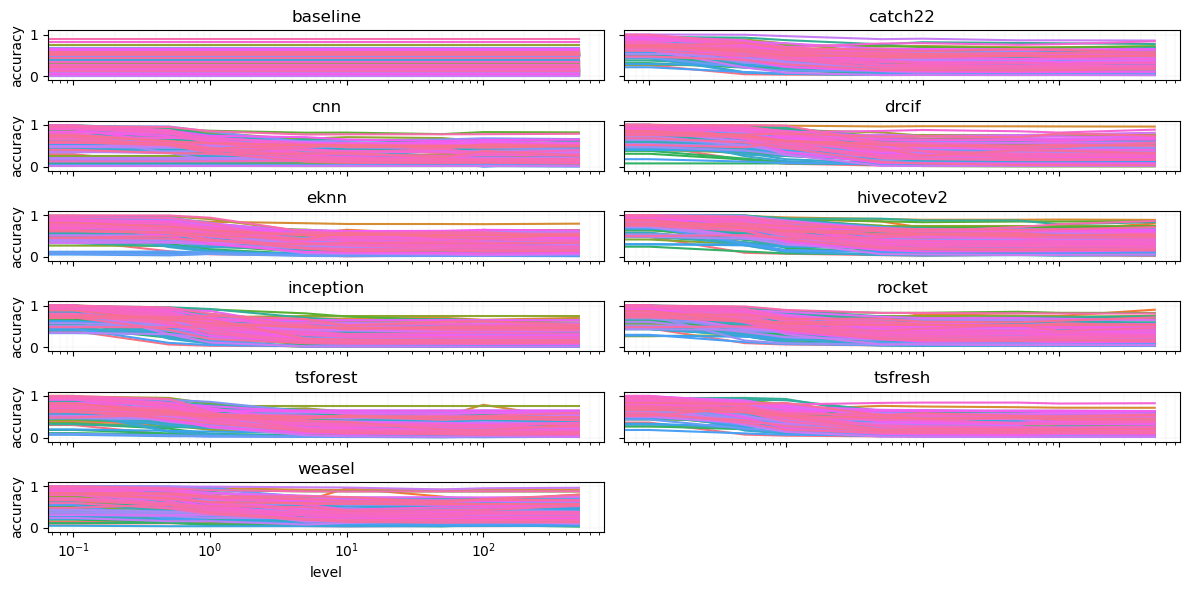

In [9]:
fig, axes = plt.subplots(6, 2, figsize=(12, 6), sharex=True, sharey=True)

axes = axes.flatten()

plt.subplots_adjust(wspace=0.03, hspace=0.1)

methods = sorted(df.method.unique())
# Loop through the methods
for i, method in enumerate(methods):
    sub_df = df.query(f'method=="{method}"').sort_values('dataset')#.query("level>0.001")
    print(method, len(sub_df))
    if len(sub_df)>0:
        sns.lineplot(
            data=sub_df,
            x='level', y='accuracy', hue='dataset',
            ax=axes[i], errorbar=None
        )
        
        if use_log_x_axis:
            axes[i].set_xscale('log')
        
        axes[i].set_title(method)
        axes[i].get_legend().remove()
        
        axes[i].set_ylim(-0.1, 1.1)
        axes[i].grid(True, which="both", linestyle="--", linewidth=0.1)

for i in range(len(methods), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig(f'figures/{transform_name}_cas.pdf', bbox_inches='tight', pad_inches=0)

In [10]:
sub_df

dataset  method            transform  seed  accuracy  \
0    ACSF1  weasel    MagnitudeWarp;1.0     0  0.360000   
0    ACSF1  weasel    MagnitudeWarp;0.0     0  0.880000   
0    ACSF1  weasel   MagnitudeWarp;50.0     0  0.170000   
0    ACSF1  weasel  MagnitudeWarp;100.0     0  0.180000   
0    ACSF1  weasel    MagnitudeWarp;5.0     0  0.230000   
..     ...     ...                  ...   ...       ...   
0     Yoga  weasel  MagnitudeWarp;100.0     0  0.574333   
0     Yoga  weasel    MagnitudeWarp;0.0     0  0.845333   
0     Yoga  weasel    MagnitudeWarp;0.5     0  0.699333   
0     Yoga  weasel  MagnitudeWarp;500.0     0  0.569333   
0     Yoga  weasel    MagnitudeWarp;0.1     0  0.828667   

                                                 pred  \
0   [5 7 5 7 5 5 5 7 5 5 7 3 3 7 3 7 7 3 3 3 1 1 1...   
0   [9 9 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 2 4 4...   
0   [7 5 5 7 5 7 5 5 5 5 7 7 7 7 7 7 7 7 7 7 1 1 7...   
0   [1 5 5 7 5 5 5 5 5 5 7 7 7 1 7 7 7 7 7 7 1 1 1...   
0   [5 5 5 7 5 5 5 7 5 5 7 3 7 7 7 7 5 7 3 7 5 5 1...   
..                                                ...   
0                                   [2 2 2 ... 2 2 2]   
0                                   [1 2 1 ... 2 2 2]   
0                                   [1 2 2 ... 2 2 1]   
0                                   [2 2 1 ... 2 2 2]   
0                                   [1 2 1 ... 2 2 2]   

                                                 true  level  \
0   [9 9 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 4 4 4...    1.0   
0   [9 9 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 4 4 4...    0.0   
0   [9 9 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 4 4 4...   50.0   
0   [9 9 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 4 4 4...  100.0   
0   [9 9 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 4 4 4...    5.0   
..                                                ...    ...   
0                                   [1 2 1 ... 2 2 2]  100.0   
0                                   [1 2 1 ... 2 2 2]    0.0   
0                                   [1 2 1 ... 2 2 2]    0.5   
0                                   [1 2 1 ... 2 2 2]  500.0   
0                                   [1 2 1 ... 2 2 2]    0.1   

         transform_type  
0     MagnitudeWarp;1.0  
0     MagnitudeWarp;0.0  
0    MagnitudeWarp;50.0  
0   MagnitudeWarp;100.0  
0     MagnitudeWarp;5.0  
..                  ...  
0   MagnitudeWarp;100.0  
0     MagnitudeWarp;0.0  
0     MagnitudeWarp;0.5  
0   MagnitudeWarp;500.0  
0     MagnitudeWarp;0.1  

[1125 rows x 9 columns]

In [11]:
#import matplotlib.pyplot as plt
#
## Creating subplots with shared x and y axes
#fig, axes = plt.subplots(5, 2, figsize=(12, 6), sharex=True, sharey=True)
#
## Flattening the axes array for easy indexing
#axes = axes.flatten()
#
## Adjusting layout to make figures touch together with no space in between
#plt.subplots_adjust(wspace=0.03, hspace=0.1)
#
#plt.show()

In [12]:
sub_df.query("level>0.001")

dataset  method            transform  seed  accuracy  \
0    ACSF1  weasel    MagnitudeWarp;1.0     0  0.360000   
0    ACSF1  weasel   MagnitudeWarp;50.0     0  0.170000   
0    ACSF1  weasel  MagnitudeWarp;100.0     0  0.180000   
0    ACSF1  weasel    MagnitudeWarp;5.0     0  0.230000   
0    ACSF1  weasel  MagnitudeWarp;500.0     0  0.200000   
..     ...     ...                  ...   ...       ...   
0     Yoga  weasel   MagnitudeWarp;50.0     0  0.575667   
0     Yoga  weasel  MagnitudeWarp;100.0     0  0.574333   
0     Yoga  weasel    MagnitudeWarp;0.5     0  0.699333   
0     Yoga  weasel  MagnitudeWarp;500.0     0  0.569333   
0     Yoga  weasel    MagnitudeWarp;0.1     0  0.828667   

                                                 pred  \
0   [5 7 5 7 5 5 5 7 5 5 7 3 3 7 3 7 7 3 3 3 1 1 1...   
0   [7 5 5 7 5 7 5 5 5 5 7 7 7 7 7 7 7 7 7 7 1 1 7...   
0   [1 5 5 7 5 5 5 5 5 5 7 7 7 1 7 7 7 7 7 7 1 1 1...   
0   [5 5 5 7 5 5 5 7 5 5 7 3 7 7 7 7 5 7 3 7 5 5 1...   
0   [5 5 5 5 5 5 5 7 7 5 7 3 7 7 7 7 9 7 7 7 5 5 1...   
..                                                ...   
0                                   [1 2 2 ... 2 2 2]   
0                                   [2 2 2 ... 2 2 2]   
0                                   [1 2 2 ... 2 2 1]   
0                                   [2 2 1 ... 2 2 2]   
0                                   [1 2 1 ... 2 2 2]   

                                                 true  level  \
0   [9 9 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 4 4 4...    1.0   
0   [9 9 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 4 4 4...   50.0   
0   [9 9 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 4 4 4...  100.0   
0   [9 9 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 4 4 4...    5.0   
0   [9 9 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 4 4 4...  500.0   
..                                                ...    ...   
0                                   [1 2 1 ... 2 2 2]   50.0   
0                                   [1 2 1 ... 2 2 2]  100.0   
0                                   [1 2 1 ... 2 2 2]    0.5   
0                                   [1 2 1 ... 2 2 2]  500.0   
0                                   [1 2 1 ... 2 2 2]    0.1   

         transform_type  
0     MagnitudeWarp;1.0  
0    MagnitudeWarp;50.0  
0   MagnitudeWarp;100.0  
0     MagnitudeWarp;5.0  
0   MagnitudeWarp;500.0  
..                  ...  
0    MagnitudeWarp;50.0  
0   MagnitudeWarp;100.0  
0     MagnitudeWarp;0.5  
0   MagnitudeWarp;500.0  
0     MagnitudeWarp;0.1  

[1000 rows x 9 columns]

In [13]:
#sns.lineplot(data=df.query('method=="rocket"'), x='level', y='accuracy', hue='dataset')
#plt.xscale('log')

In [14]:
#sns.lineplot(data=df.query('method=="catch22"'), x='level', y='accuracy', hue='dataset')
#plt.xscale('log')

In [15]:
#sns.lineplot(data=df.query('method=="tsforest"'), x='level', y='accuracy', hue='dataset')
#plt.xscale('log')

In [16]:
#sns.lineplot(data=df.query('method=="cnn"'), x='level', y='accuracy', hue='dataset')
#plt.xscale('log')

In [17]:


#hc = HIVECOTEV2(n_jobs=-1)

In [18]:
#fhgfgh=dfgdg

In [19]:
df

dataset     method            transform  seed  accuracy  \
0                   Yoga      drcif  MagnitudeWarp;100.0     0  0.507000   
0            SwedishLeaf   baseline   MagnitudeWarp;50.0     0  0.052800   
0    EOGHorizontalSignal        cnn  MagnitudeWarp;500.0     0  0.082873   
0   RefrigerationDevices        cnn   MagnitudeWarp;10.0     0  0.378667   
0             ScreenType       eknn  MagnitudeWarp;500.0     0  0.349333   
..                   ...        ...                  ...   ...       ...   
0            ShapeletSim        cnn   MagnitudeWarp;10.0     0  0.461111   
0        GestureMidAirD2     weasel    MagnitudeWarp;0.1     0  0.200000   
0      DodgerLoopWeekend  inception    MagnitudeWarp;1.0     0  0.471014   
0         PigArtPressure    tsfresh    MagnitudeWarp;5.0     0  0.043269   
0               FacesUCR       eknn  MagnitudeWarp;100.0     0  0.212195   

                                                 pred  \
0                                   [1 1 1 ... 1 1 1]   
0   [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 ...   
0   [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8...   
0   [1 1 1 1 3 3 3 3 3 2 1 1 1 2 1 1 2 3 2 3 3 3 1...   
0   [1 2 3 1 3 3 2 2 2 3 3 2 1 2 2 1 3 3 1 2 2 3 2...   
..                                                ...   
0   [1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1...   
0   [22 17  8 17  8 21 22 15 23 23  8 13 22  1 15 ...   
0   [2 2 2 2 1 2 2 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 2...   
0   [18  2 29  8 34  5  6 47 27 27  2 42  6 47 27 ...   
0                             [13  7  6 ...  9 13  7]   

                                                 true  level  \
0                                   [1 2 1 ... 2 2 2]  100.0   
0   [10 11  8 12 14  1  5 11 13  6  1 15 10  7  2 ...   50.0   
0   [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2 ...  500.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   10.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...  500.0   
..                                                ...    ...   
0   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   10.0   
0   [ 5 12 18 13 22 20 11 10 16 22 11 12 16  2  1 ...    0.1   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...    1.0   
0   [ 1  1  1  1  2  2  2  2  3  3  3  3  4  4  4 ...    5.0   
0                                   [8 7 6 ... 9 9 7]  100.0   

         transform_type  
0   MagnitudeWarp;100.0  
0    MagnitudeWarp;50.0  
0   MagnitudeWarp;500.0  
0    MagnitudeWarp;10.0  
0   MagnitudeWarp;500.0  
..                  ...  
0    MagnitudeWarp;10.0  
0     MagnitudeWarp;0.1  
0     MagnitudeWarp;1.0  
0     MagnitudeWarp;5.0  
0   MagnitudeWarp;100.0  

[12375 rows x 9 columns]

In [20]:
def get_ranks(df, reps =30):
    algo_ranks = {x: 0 for x in df.method.unique()}
    for _ in range(reps):
        pdf = df.sample(frac=1).reset_index(drop=True)
        l = pdf.drop_duplicates(subset='method', keep='first').sort_values('accuracy', ascending=False)
        for i, (_, row) in enumerate(l.iterrows()):
            algo_ranks[row['method']] += (i+1)/reps
    return algo_ranks

def get_all_ranks(df):
    new_df = {'dataset': [], 'transform': [], 'method': [], 'rank': []}
    for dataset in df.dataset.unique():
        for transform in df['transform'].unique():
            subset = df.query(f'dataset=="{dataset}" and transform=="{transform}"').sample(frac=1).reset_index(drop=True)
            ranks = get_ranks(subset)
            #print(dataset, transform, ranks)
            for k, v in ranks.items():
                new_df['dataset'].append(dataset)
                new_df['transform'].append(transform)
                new_df['method'].append(k)
                new_df['rank'].append(v)
    return pd.DataFrame(new_df)

df_ranks = get_all_ranks(df)
df_ranks['level'] = df_ranks['transform'].apply(lambda x: float(x.split(';')[1]))
df_ranks

dataset            transform      method  rank  level
0                   Yoga  MagnitudeWarp;100.0  hivecotev2   4.0  100.0
1                   Yoga  MagnitudeWarp;100.0      weasel   1.0  100.0
2                   Yoga  MagnitudeWarp;100.0    tsforest   8.0  100.0
3                   Yoga  MagnitudeWarp;100.0     tsfresh  11.0  100.0
4                   Yoga  MagnitudeWarp;100.0       drcif   6.0  100.0
...                  ...                  ...         ...   ...    ...
12370  DodgerLoopWeekend    MagnitudeWarp;5.0    baseline   3.0    5.0
12371  DodgerLoopWeekend    MagnitudeWarp;5.0    tsforest  10.0    5.0
12372  DodgerLoopWeekend    MagnitudeWarp;5.0      rocket   7.0    5.0
12373  DodgerLoopWeekend    MagnitudeWarp;5.0   inception  11.0    5.0
12374  DodgerLoopWeekend    MagnitudeWarp;5.0         cnn   6.0    5.0

[12375 rows x 5 columns]

In [21]:
#import matplotlib.pyplot as plt

#fig, axes = plt.subplots(2, 1, figsize=(8, 10))  # Adjust figsize as needed

# For the "Car" dataset
#sub = df_ranks.query('dataset=="Car"')
#for method in sorted(sub['method'].unique()):
#    print(method)
#    h = sub.query(f'method=="{method}"').sort_values('level')
#    axes[0].plot(h['level'], h['rank'], label=method)
#axes[0].legend()
#axes[0].set_xscale('log')
#axes[0].set_title('Car')  # Optional title

# For the "ChlorineConcentration" dataset
#sub = df_ranks.query('dataset=="ChlorineConcentration"')
#for method in sorted(sub['method'].unique()):
#    print(method)
#    h = sub.query(f'method=="{method}"').sort_values('level')
#    axes[1].plot(h['level'], h['rank'], label=method)
#axes[1].legend()
#axes[1].set_xscale('log')
#axes[1].set_title('ChlorineConcentration')  # Optional title

#plt.tight_layout()
#plt.show()

In [22]:
#df_ranks

In [23]:
#linewidth = 2
#linestyle = '-'
#
#display_mapped_fields = {
#    'baseline': {'linestyle': '--', 'color':'black', 'linewidth':linewidth},
#    'catch22': {'linestyle': linestyle, 'color':'tab:blue', 'linewidth':linewidth},
#    'cnn': {'linestyle': linestyle, 'color':'tab:orange', 'linewidth':linewidth},
#    'drcif': {'linestyle': linestyle, 'color':'tab:green', 'linewidth':linewidth},
#    'eknn': {'linestyle': linestyle, 'color':'tab:red', 'linewidth':linewidth},
#    'hivecotev2': {'linestyle': linestyle, 'color':'tab:purple', 'linewidth':linewidth},
#    'inception': {'linestyle': linestyle, 'color':'tab:pink', 'linewidth':linewidth},
#    'rocket': {'linestyle': linestyle, 'color':'tab:gray', 'linewidth':linewidth},
#    'tsforest': {'linestyle': linestyle, 'color':'tab:olive', 'linewidth':linewidth},
#    'tsfresh': {'linestyle': linestyle, 'color':'tab:cyan', 'linewidth':linewidth},
#    'weasel': {'linestyle': linestyle, 'color':'yellow', 'linewidth':linewidth},
#}

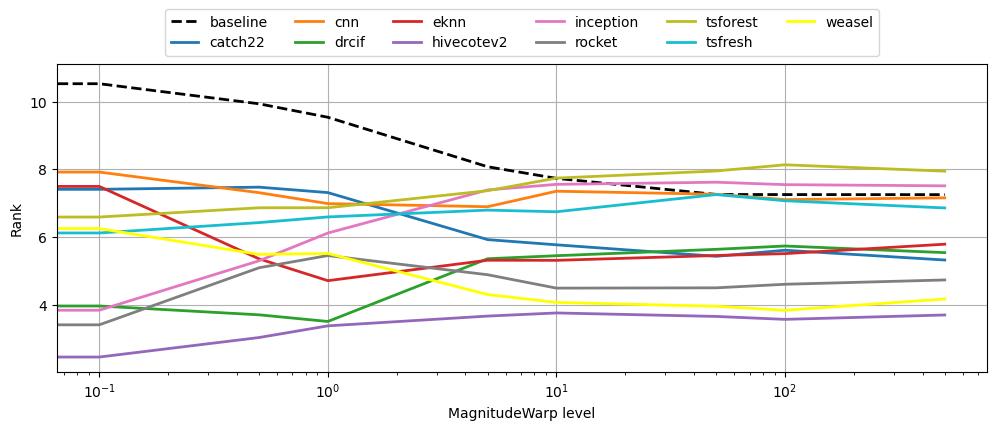

In [24]:
plt.figure(figsize=(12, 4))
sub = df_ranks[['method', 'transform', 'rank', 'level']].groupby(['method', 'transform']).mean().reset_index()

for method in methods:
    h = sub.query(f'method=="{method}"').sort_values('level')
    plt.plot(h['level'], h['rank'], label=method, **display_mapped_fields[method])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=(int(len(methods))/2)+1)
plt.xlabel(f'{transform_name} level')
plt.ylabel('Rank')

if use_log_x_axis:
    plt.xscale('log')

plt.grid()
plt.savefig(f'figures/{transform_name}_rank.pdf', bbox_inches='tight', pad_inches=0)

In [25]:
methods

['baseline',
 'catch22',
 'cnn',
 'drcif',
 'eknn',
 'hivecotev2',
 'inception',
 'rocket',
 'tsforest',
 'tsfresh',
 'weasel']